In [58]:
pip install notebook yfinance


In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
from collections import defaultdict
import cvxpy as cp
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import leaves_list
import datetime

In [60]:
#: Define sectors and their tickers
tickers = {
    'Commodities': [
        'RELIANCE.NS', 'ULTRACEMCO.NS', 'TATASTEEL.NS', 'NTPC.NS',
        'JSWSTEEL.NS', 'ONGC.NS', 'GRASIM.NS', 'HINDALCO.NS',
        'COALINDIA.NS', 'UPL.NS'
    ],
    'Energy': [
        'RELIANCE.NS', 'NTPC.NS', 'POWERGRID.NS', 'ONGC.NS',
        'TATAPOWER.NS', 'BPCL.NS', 'IOC.NS', 'GAIL.NS',
        'ADANITRANS.NS', 'ADANIGREEN.NS'
    ],
    'Manufacturing': [
        'SUNPHARMA.NS', 'RELIANCE.NS', 'M&M.NS', 'TATASTEEL.NS',
        'MARUTI.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'TATAMOTORS.NS',
        'DRREDDY.NS', 'CIPLA.NS'
    ],
    'Services': [
        'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'HDFC.NS',
        'TCS.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'BHARTIARTL.NS', 'BAJFINANCE.NS'
    ],
    'MNC': [
        'MARUTI.NS', 'HINDUNILVR.NS', 'NESTLEIND.NS', 'BRITANNIA.NS',
        'VEDL.NS', 'SIEMENS.NS', 'AMBUJACEM.NS', 'MCDOWELL-N.NS',
        'CUMMINSIND.NS', 'ASHOKLEY.NS'
    ],
    'Transport': [
        'M&M.NS', 'MARUTI.NS', 'TATAMOTORS.NS', 'ADANIPORTS.NS',
        'EICHERMOT.NS', 'BAJAJ-AUTO.NS', 'HEROMOTOCO.NS', 'TIINDIA.NS',
        'TVSMOTOR.NS', 'ASHOKLEY.NS'
    ],
    'Infrastructure': [
        'RELIANCE.NS', 'LT.NS', 'BHARTIARTL.NS', 'ULTRACEMCO.NS',
        'NTPC.NS', 'POWERGRID.NS', 'ONGC.NS', 'GRASIM.NS',
        'APOLLOHOSP.NS', 'ADANIPORTS.NS'
    ],
    'Housing': [
        'LT.NS', 'ASIANPAINT.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',
        'ULTRACEMCO.NS', 'TATASTEEL.NS', 'NTPC.NS', 'HDFC.NS',
        'JSWSTEEL.NS', 'GRASIM.NS'
    ],
    'Consumption': [
        'ITC.NS', 'HINDUNILVR.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS',
        'M&M.NS', 'MARUTI.NS', 'TITAN.NS', 'NESTLEIND.NS',
        'BRITANNIA.NS', 'DMART.NS'
    ],
    'ESG': [
        'INFY.NS', 'TCS.NS', 'HDFC.NS', 'HCLTECH.NS',
        'ICICIBANK.NS', 'BHARTIARTL.NS', 'TECHM.NS', 'KOTAKBANK.NS',
        'BAJFINANCE.NS', 'TITAN.NS'
    ]
}



In [61]:
#: Download historical data
unique_tickers = list(set(ticker for sector in tickers.values() for ticker in sector))

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

data = yf.download(
    unique_tickers,
    start=start_date,
    end=end_date,
    auto_adjust=True,
    group_by="ticker",
    progress=False
)

prices_df = pd.DataFrame()
missing_tickers = []

for ticker in unique_tickers:
    try:
        prices_df[ticker] = data[ticker]['Close']
    except:
        missing_tickers.append(ticker)

prices_df.dropna(axis=1, inplace=True)

if missing_tickers:
    print("\n Missing/Delisted Tickers Skipped:")
    print(missing_tickers)


ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['MCDOWELL-N.NS', 'ADANITRANS.NS', 'HDFC.NS']: YFTzMissingError('possibly delisted; no timezone found')


In [62]:
train_daily_returns = train_data.pct_change().dropna()
test_daily_returns = test_data.pct_change().dropna()

In [63]:
class Hierarchy:
  #This is the constructor
  def __init__(self,returns):
    self.returns = returns
    self.linkage_matrix= None
    self.distance_matrix = None
  def distance(self):

    self.correlation_matrix = self.returns.corr().abs()
    self.distance_matrix = np.sqrt(0.5 * (1 - self.correlation_matrix.values))
    return self.distance_matrix

  def linkage(self,mathod='ward'):
    if self.distance_matrix is None:
            self.distance()
   #use the ward method to compute the distance between the clusters
   # use the condensed distance matrix
    upper_triangular = squareform(self.distance_matrix, checks = False) #condensed form
    self.linkage_matrix = linkage(upper_triangular, method = 'ward')
    return self.linkage_matrix

  def dendrogram(self):
      if self.linkage_matrix is None:
        self.linkage()
        plt.figure(figsize=(11,7))
        dendrogram(linkage_matrix, labels=daily_returns.columns)
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Stocks')
        plt.ylabel('Distance')
        plt.show()
      #create the dendrogram



In [64]:
#Use the class created above
hierarchy = Hierarchy(train_daily_returns)
linkage_matrix= hierarchy.linkage()
hierarchy.dendrogram()


In [65]:
#QUASI-DIAGONALISATION
asserts_order = leaves_list(linkage_matrix) #I extracts stocks the way in an order that they are in the linkage_matrix so that i can reorder them properly


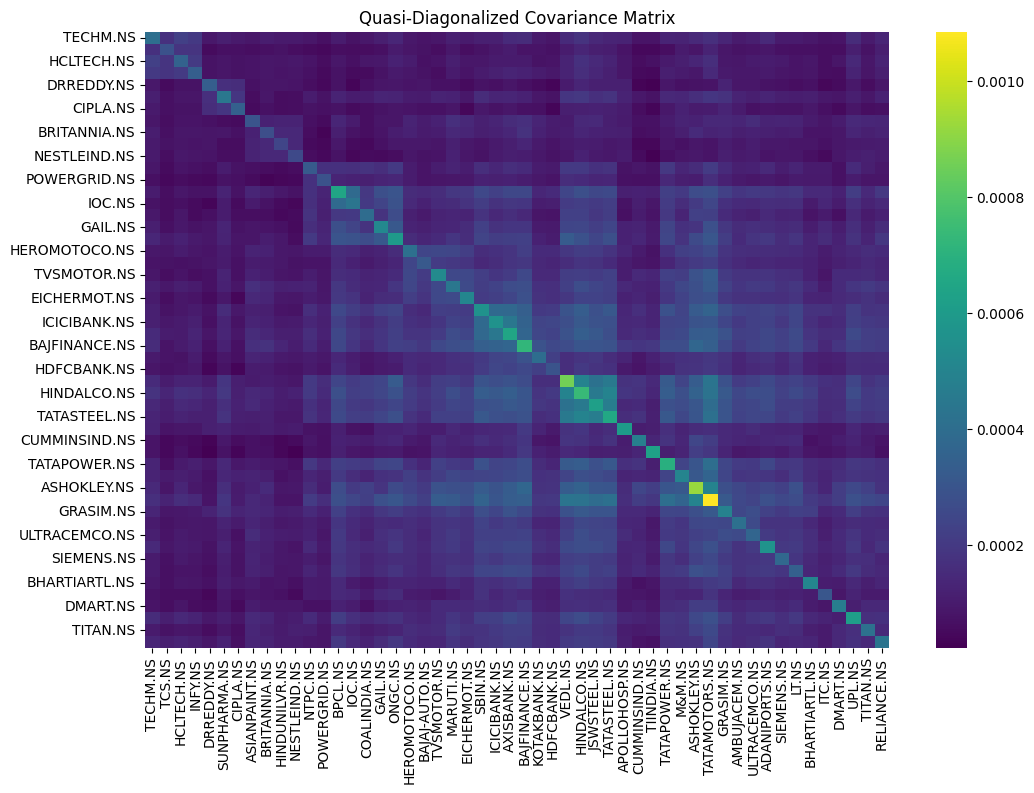

In [66]:

leaf_order = leaves_list(linkage_matrix)
covariance_matrix= train_daily_returns.cov()
reordered_covariance_matrix = covariance_matrix.iloc[leaf_order, leaf_order]

plt.figure(figsize=(12,8))
sns.heatmap(reordered_covariance_matrix, cmap='viridis')
plt.title("Quasi-Diagonalized Covariance Matrix")
plt.show()


In [67]:
#This function computes the inverse-variance portfolio weights.(compute weights inversely proportional to the vaiance)
def computeIVP(cov):
  ivp = 1/ np.diag(cov) #Variance of stocks  are at the diagonal of the covariance matrix
  ivp /= ivp.sum() #Normalise the weights
  return ivp

In [68]:
#This function computes the variance of each cluster
def clusterVar(cov_matrix, stocks_in_cluster):
  cov_subset = cov_matrix.loc[stocks_in_cluster, stocks_in_cluster]
  inverse_variance_port = compute_ivp(cov_subset) #compute weights of stocks in clusters that are inversely proportional to their variance
  cluster_variance = inverse_variance_port@cov_subset@inverse_variance_port
  return cluster_variance





In [69]:
#This function computes the final weights allocated to the individual stocks based on the recursive bisection algorithm

def recBisect(cov_matrix, indices):
    weights = pd.Series(1.0, index=indices)  # Start with weight 1 for all

    def bisection(sub_indices):
        if len(sub_indices) <= 1:
            return  # Base case

        split = len(sub_indices) // 2
        left = sub_indices[:split]
        right = sub_indices[split:]

        # Calculate variances for left and right clusters
        var_left = clusterVar(cov_matrix, left)
        var_right = clusterVar(cov_matrix, right)

        # Risk-Parity allocation (inversely proportional to variance)
        total_var = var_left + var_right
        alloc_left = 1 - var_left / total_var
        alloc_right = 1- alloc_left

        # Update weights
        weights[left] *= alloc_left
        weights[right] *= alloc_right

        # Recursively bisect left and right groups
        bisection(left)
        bisection(right)

    bisection(indices)
    return weights



In [73]:
# Get the stock names in the order determined by hierarchical clustering
stock_names = train_daily_returns.columns[leaf_order]

# Make sure the covariance matrix is properly ordered
reordered_covariance_matrix = train_daily_returns.cov().loc[stock_names, stock_names]

weights = recBisect(reordered_covariance_matrix, stock_names)
weights /= weights.sum() #Normalise the weights

# Create final weight series
final_weights = pd.Series(weights, index=stock_names)
print(final_weights)

TECHM.NS         0.028218
TCS.NS           0.025557
HCLTECH.NS       0.020542
INFY.NS          0.041137
DRREDDY.NS       0.029194
SUNPHARMA.NS     0.022033
CIPLA.NS         0.041424
ASIANPAINT.NS    0.033572
BRITANNIA.NS     0.036610
HINDUNILVR.NS    0.038056
NESTLEIND.NS     0.035385
NTPC.NS          0.028762
POWERGRID.NS     0.031645
BPCL.NS          0.015546
IOC.NS           0.015648
COALINDIA.NS     0.017398
GAIL.NS          0.020474
ONGC.NS          0.013619
HEROMOTOCO.NS    0.019694
BAJAJ-AUTO.NS    0.030544
TVSMOTOR.NS      0.012073
MARUTI.NS        0.014218
EICHERMOT.NS     0.013066
SBIN.NS          0.011754
ICICIBANK.NS     0.009476
AXISBANK.NS      0.008158
BAJFINANCE.NS    0.014325
KOTAKBANK.NS     0.015988
HDFCBANK.NS      0.021653
VEDL.NS          0.010967
HINDALCO.NS      0.007659
JSWSTEEL.NS      0.009158
TATASTEEL.NS     0.016015
APOLLOHOSP.NS    0.014546
CUMMINSIND.NS    0.018504
TIINDIA.NS       0.012719
TATAPOWER.NS     0.011546
M&M.NS           0.012935
ASHOKLEY.NS 

In [84]:
results_summary = []

for sector_name, sector_tickers in tickers.items():
    # Filter valid tickers
    valid_tickers = [t for t in sector_tickers if t in prices_df.columns]
    if len(valid_tickers) < 2:
        print(f"Skipping {sector_name}: Not enough valid tickers.")
        continue

    # Get training data
    sector_train = train_data[valid_tickers]
    daily_returns = sector_train.pct_change().dropna()

    # --- HRP Weight Calculation ---
    # Calculate correlation matrix and distance matrix
    corr_matrix = daily_returns.corr().abs()
    distance_matrix = np.sqrt(0.5 * (1 - corr_matrix))

    # Perform hierarchical clustering
    linkage_matrix = linkage(squareform(distance_matrix, checks=False), method='ward')
    leaf_order = leaves_list(linkage_matrix)

    # Reorder covariance matrix based on clustering (keep as DataFrame)
    cov_matrix = daily_returns.cov()
    reordered_cov = cov_matrix.iloc[leaf_order, leaf_order]

    # Get the ordered stock names
    ordered_stocks = daily_returns.columns[leaf_order].tolist()

    # Calculate HRP weights using stock names
    hrp_weights = recBisect(reordered_cov, ordered_stocks)
    hrp_weights /= hrp_weights.sum()

    # Create Series with weights mapped to tickers
    hrp_weights = pd.Series(hrp_weights, index=ordered_stocks)

    # --- Test Performance ---
    sector_test = test_data[valid_tickers]
    test_daily_returns = sector_test.pct_change().dropna()

    # Portfolio returns (daily)
    portfolio_test_returns = test_daily_returns.dot(hrp_weights)

    # Calculate performance metrics
    annual_return_test = portfolio_test_returns.mean() * 250  # Trading days
    annual_volatility_test = portfolio_test_returns.std() * np.sqrt(250)
    sharpe_ratio_test = (annual_return_test - 0.01) / annual_volatility_test  # Assuming 1% risk-free rate

    results_summary.append({
        'Sector': sector_name,
        'Annual Return (%)': annual_return_test * 100,
        'Annual Volatility (%)': annual_volatility_test * 100,
        'Sharpe Ratio': sharpe_ratio_test,
        'Method': 'HRP',
        'Weights': hrp_weights.to_dict()  # Store weights for analysis
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results_summary)
print(results_df)

           Sector  Annual Return (%)  Annual Volatility (%)  Sharpe Ratio  \
0     Commodities          21.229194              21.773528      0.929073   
1          Energy          15.033858              19.014419      0.738064   
2   Manufacturing          12.017347              17.391814      0.633479   
3        Services           5.633173              18.382171      0.252047   
4             MNC          20.053572              16.852022      1.130640   
5       Transport          25.699512              21.104208      1.170360   
6  Infrastructure          14.148295              17.540180      0.749610   
7         Housing          11.227848              18.991926      0.538537   
8     Consumption          13.609918              16.379131      0.769877   
9             ESG          -7.265021              19.020367     -0.434535   

  Method                                            Weights  
0    HRP  {'NTPC.NS': 0.18357785709908733, 'ONGC.NS': 0....  
1    HRP  {'TATAPOWER.NS': 0